## Logistic Regression

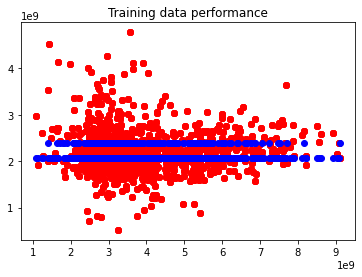

In [1]:
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.model_selection import KFold             # 匯入 K 次交叉驗證工具
from sklearn.metrics import accuracy_score            # 匯入準確度計算工具
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train = train_df[['Volume']]  # 取出訓練資料需要分析的資料欄位
train_x = train[0:1000]
train_y = train[1000:2000]
test = test_df[['Volume']]  # 取出訓練資料需要分析的資料欄位
test_x = test[0:100]
test_y = test[100:200]

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_x_list = []
train_y_list = []                                   # 儲存每次訓練模型的準確度
valid_x_list = []
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = linear_model.LogisticRegression()
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_x_list.append(train_x_split['Volume'].tolist())
    train_y_list.append(train_y_split['Volume'].tolist())

    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_x_list.append(valid_x_split['Volume'].tolist())
    valid_acc_list.append(valid_pred_y.tolist())

plt.scatter(train_x_list, train_y_list, color='red') # 畫出訓練資料答案分佈
plt.scatter(valid_x_list, valid_acc_list, color='blue') # 畫出訓練資料預測分佈

plt.title('Training data performance')
plt.show()
# print((
#     'average train accuracy: {}\n' +
#     '    min train accuracy: {}\n' +
#     '    max train accuracy: {}\n' +
#     'average valid accuracy: {}\n' +
#     '    min valid accuracy: {}\n' +
#     '    max valid accuracy: {}').format(
#     np.mean(train_acc_list),                          # 輸出平均訓練準確度
#     np.min(train_acc_list),                           # 輸出最低訓練準確度
#     np.max(train_acc_list),                           # 輸出最高訓練準確度
#     np.mean(valid_acc_list),                          # 輸出平均驗證準確度
#     np.min(valid_acc_list),                           # 輸出最低驗證準確度
#     np.max(valid_acc_list)                            # 輸出最高驗證準確度
# ))

## NeuralNetwork

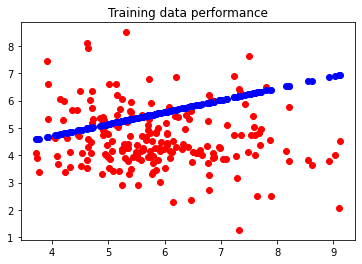

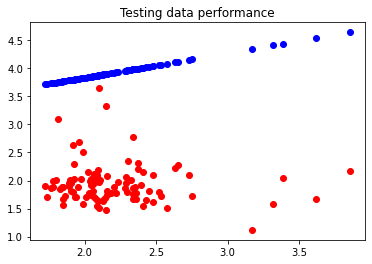

In [2]:
from torch.utils.data import Dataset # 匯入資料集 base class
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_df = pd.read_csv('train.csv')      # 讀取資料，請勿更改路徑
train_data_list = train_df['Volume'].div(1000000000).tolist()
train_data_list = list(map(float,train_data_list))
test_df = pd.read_csv('test.csv')      # 讀取資料，請勿更改路徑
test_data_list = test_df['Volume'].div(1000000000).tolist()
test_data_list = list(map(float,test_data_list))

class TrainDataset(Dataset):            # 繼承 base class 創造資料集
    def __init__(self, size):        # 給予資料集大小，並隨機創造資料

        self.x = torch.tensor(train_data_list[0:size])
        self.y = torch.tensor(train_data_list[size:2*size])
        
    def __len__(self):               # 定義總資料數
        return len(self.x)
    
    def __getitem__(self, index):    # 定義取出單一資料的方法
        return self.x[index], self.y[index]

class TestDataset(Dataset):            # 繼承 base class 創造資料集
    def __init__(self, size):        # 給予資料集大小，並隨機創造資料

        self.x = torch.tensor(test_data_list[0:size])
        self.y = torch.tensor(test_data_list[size:2*size])
        
    def __len__(self):               # 定義總資料數
        return len(self.x)
    
    def __getitem__(self, index):    # 定義取出單一資料的方法
        return self.x[index], self.y[index]

import torch.nn as nn                   # 匯入神經網路模型
import torch.nn.functional as F         # 匯入激發函數

class MyModel(nn.Module):               # 模型需要繼承自 nn.Module
    def __init__(self,                  # 定義模型結構
                 in_dim,                # 定義輸入層維度
                 hid_dim,               # 定義隱藏層維度
                 out_dim):              # 定義輸出層維度

        super(MyModel, self).__init__() # 繼承 nn.Module 所有屬性
        
        self.layer1 = nn.Linear(        # 創造線性層 self.layer1
            in_features=in_dim,         # 設定線性層輸入維度
            out_features=hid_dim        # 設定線性層輸出維度
        )
        self.layer2 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim,        # 設定線性層輸入維度
            out_features=hid_dim+10        # 設定線性層輸出維度
        )
        self.layer3 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+10,        # 設定線性層輸入維度
            out_features=hid_dim+20        # 設定線性層輸出維度
        )
        self.layer4 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+20,        # 設定線性層輸入維度
            out_features=hid_dim+10        # 設定線性層輸出維度
        )
        self.layer5 = nn.Linear(        # 創造線性層 self.layer2
            in_features=hid_dim+10,        # 設定線性層輸入維度
            out_features=out_dim        # 設定線性層輸出維度
        )
        
    def forward(self, batch_x):         # 定義運算流程
        h = self.layer1(batch_x)        # 使用線性層 self.layer1 輸入 batch_x 計算得到 h
        y = self.layer2(h)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y1 = self.layer3(y)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y2 = self.layer4(y1)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        y3 = self.layer5(y2)              # 使用線性層 self.layer2 輸入 a 計算得到 y
        return y3                        # 輸出 y                # 輸出 y
    

from torch.utils.data import DataLoader # 匯入資料集抽樣工具

def collate_fn(batch):                  # 定義格式化的方法
    x_list = []
    y_list = []
    
    for x, y in batch:
        x_list.append([x])              # 將每個 x 轉換成 [x]
        y_list.append([y])              # 將每個 y 轉換成 [y]
        
    return [torch.tensor(x_list),       # 最終回傳的維度為 (batch_size, features)
            torch.tensor(y_list)]       # 最終回傳的維度為 (batch_size, labels)

import torch.nn as nn                   # 匯入神經網路模型
import torch.nn.functional as F         # 匯入激發函數

if torch.cuda.is_available():                   # 如果有可用 GPU 時採用 GPU cuda:0
    device = torch.device('cuda:0')
else:                                           # 若無 GPU 可用則使用 CPU
    device = torch.device('cpu')

train_dataset = TrainDataset(200)         # 創造訓練資料集
test_dataset = TestDataset(100)           # 創造測試資料集

# 設定超參數

batch_size = 10                       # 設定每次抽樣的數量
n_epoch = 100                             # 設定資料集總訓練次數
hid_dim = 100                            # 設定隱藏層維度

train_data_loader = DataLoader(         # 創造 DataLoader 實例
    train_dataset,                      # 對資料集 train_dataset 進行抽樣
    batch_size=batch_size,              # 設定每次抽樣的數量
    shuffle=True,                       # 設定隨機抽樣
    collate_fn=collate_fn               # 指定格式化的方法
)
test_data_loader = DataLoader(          # 創造 DataLoader 實例
    test_dataset,                       # 對資料集 test_dataset 進行抽樣
    batch_size=batch_size,              # 設定每次抽樣的數量
    shuffle=True,                       # 設定隨機抽樣
    collate_fn=collate_fn               # 指定格式化的方法
)

model = MyModel(                        # 創造 MyModel 模型實例
    in_dim=1,                           # 設定輸入層維度
    hid_dim=hid_dim,                    # 設定隱藏層維度
    out_dim=1                           # 設定輸出層維度
)
model = model.to(device)                # 將模型搬移至 GPU

criterion = nn.MSELoss()                # 創造均方誤差計算工具

from torch.optim import SGD             # 匯入計算梯度下降演算法的工具

optimizer = SGD(                        # 創造計算隨機梯度下降的工具
    model.parameters(),                 # 設定計算梯度下降的目標
    lr=0.000001                           # 設定學習率
)

for epoch in range(n_epoch):            # 總共訓練 n_epoch 次
    for batch_x, batch_y in train_data_loader:
        batch_x = batch_x.to(device)    # 將訓練資料搬移至 GPU
        batch_y = batch_y.to(device)    # 將訓練資料標記搬移至 GPU
        
        pred_y = model(batch_x)         # 自動呼叫 forward 計算 batch_x 得到 pred_y
        loss = criterion(pred_y,        # 計算 pred_y 與 batch_y 的均方誤差
                         batch_y)
        
        loss.backward()                 # 使用向後傳播計算梯度
        optimizer.step()                # 使用梯度下降更新模型參數
    
    with torch.no_grad():               # 此區塊不會計算梯度
        total_loss = 0                  # 統計訓練資料誤差
        for batch_x, batch_y in train_data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            pred_y = model(batch_x)
            loss = criterion(pred_y, batch_y)

            total_loss += float(loss) / len(train_data_loader)
        # print('Epoch {}, training loss: {}'.format(epoch, total_loss))
        
        total_loss = 0                  # 統計測試資料誤差
        for batch_x, batch_y in test_data_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            pred_y = model(batch_x)
            loss = criterion(pred_y, batch_y)
            
            total_loss += float(loss) / len(test_data_loader)
            
        # print('Epoch {}, testing loss: {}'.format(epoch, total_loss))

with torch.no_grad():
    for batch_x, batch_y in train_data_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        pred_y = model(batch_x)
        
        batch_x = batch_x.to('cpu')
        batch_y = batch_y.to('cpu')
        pred_y = pred_y.to('cpu')
        plt.scatter(batch_x, batch_y, color='red') # 畫出訓練資料答案分佈
        plt.scatter(batch_x, pred_y, color='blue') # 畫出訓練資料預測分佈
        
    plt.title('Training data performance')
    plt.show()
    
    for batch_x, batch_y in test_data_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        pred_y = model(batch_x)

        batch_x = batch_x.to('cpu')
        batch_y = batch_y.to('cpu')
        pred_y = pred_y.to('cpu')
        plt.scatter(batch_x, batch_y, color='red') # 畫出測試資料答案分佈
        plt.scatter(batch_x, pred_y, color='blue') # 畫出測試資料預測分佈
    
    plt.title('Testing data performance')
    plt.show()

## Other classifier

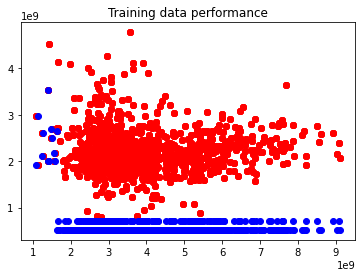

In [3]:
from sklearn.tree import DecisionTreeClassifier       # 匯入決策樹模型

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train = train_df[['Volume']]  # 取出訓練資料需要分析的資料欄位
train_x = train[0:1000]
train_y = train[1000:2000]

kf = KFold(n_splits=5,                                # 設定 K 值
           random_state=1012,
           shuffle=True)
kf.get_n_splits(train_x)                              # 給予資料範圍

train_x_list = []
train_y_list = []                                   # 儲存每次訓練模型的準確度
valid_x_list = []
valid_acc_list = []                                   # 儲存每次驗證模型的準確度

for train_index, valid_index in kf.split(train_x):    # 每個迴圈都會產生不同部份的資料
    train_x_split = train_x.iloc[train_index]         # 產生訓練資料
    train_y_split = train_y.iloc[train_index]         # 產生訓練資料標籤
    valid_x_split = train_x.iloc[valid_index]         # 產生驗證資料
    valid_y_split = train_y.iloc[valid_index]         # 產生驗證資料標籤
    
    model = DecisionTreeClassifier(                   # 創造決策樹模型
        random_state=1012,                            # 參考助教上課內容和自己的測試
        criterion='gini',
        max_depth=10,
        max_leaf_nodes=6 ** 2)             
    model.fit(train_x_split, train_y_split)           # 訓練決策樹模型
    
    train_pred_y = model.predict(train_x_split)       # 確認模型是否訓練成功
    train_x_list.append(train_x_split['Volume'].tolist())
    train_y_list.append(train_y_split['Volume'].tolist())

    valid_pred_y = model.predict(valid_x_split)       # 驗證模型是否訓練成功
    valid_x_list.append(valid_x_split['Volume'].tolist())
    valid_acc_list.append(valid_pred_y.tolist())

plt.scatter(train_x_list, train_y_list, color='red') # 畫出訓練資料答案分佈
plt.scatter(valid_x_list, valid_acc_list, color='blue') # 畫出訓練資料預測分佈

plt.title('Training data performance')
plt.show()